---

# TalkJulia (Randy) - Part 1. DataFrames.jl 

The Julia ```DataFrames.jl``` package gives Julia programmers the ability to manipulate and work with tabular data in a very nice way! The core object of this package is the ```DataFrame``` type and is very similar DataFrames found in both Python and R. 

For those of you coming from a Python or R background, check out [Julia DataFrames for Python and R Programmers](https://dataframes.juliadata.org/stable/man/comparisons/). 

Making use of the ```RDatasets.jl``` package and its built in ```dataset()``` function, we can read in the famed [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) directly into a ```DataFrame``` type and then view the first 10 rows of the ```DataFrame``` by running the following code in the cell below.
```julia
using RDatasets
using Plots
using DataFrames

# Load Iris Dataset using RDatasets
iris = RDatasets.dataset("datasets", "iris")

# Show the first 10 rows of data
DataFrames.first(iris, 10)

```

---

In [1]:
using RDatasets
using Plots
using DataFrames

# Load Iris Dataset using RDatasets
iris = RDatasets.dataset("datasets", "iris")

# Show the first 10 rows of data
DataFrames.first(iris, 10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


---

### Accessing the Columns of a ```DataFrame```

There are several ways to access the columns of a ```DataFrame``` type. For example, any of the code shown below will access the ```SepalLength``` column in our ```DataFrame```.
```julia
# The dot way
iris.SepalLength

# The colon-string way
iris[:, "SepalLength"]

# The bang-string way
iris[!, "SepalLength"]

# The colon-symbol way
iris[:, :SepalLength

# The bang-symbol way
iris[!, :SepalLength]

```


---

In [3]:
# The bang-symbol way
iris[!, :SepalLength]

150-element Vector{Float64}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4
 4.6
 5.0
 4.4
 4.9
 ⋮
 6.9
 5.8
 6.8
 6.7
 6.7
 6.3
 6.5
 6.2
 5.9

---

In a similar manor, there exists multiple ways to access several columns of a ```DataFrame``` type at a time. Any of the ways shown below will access the sepal length and sepal width columns of our ```DataFrame```.
```julia

# The colon-array of strings way
iris[:, ["SepalLength", "SepalWidth"]]

# The bang-array of strings way
iris[!, ["SepalLength", "SepalWidth"]]

# The colon-array of symbols way
iris[:, [:SepalLength, :SepalWidth]]

# The bang-array of symbols way (I think the peferred way??)
iris[!, [:SepalLength, :SepalWidth]]

```


---

In [4]:
# The bang-array of symbols way (I think the peferred way??)
iris[!, [:SepalLength, :SepalWidth]]

,SepalLength,SepalWidth
,Float64,Float64
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6
6,5.4,3.9
7,4.6,3.4
8,5.0,3.4
9,4.4,2.9


---

### Accessing the Rows of a ```DataFrame```
Unlike Python, it seems that Julia treats ```DataFrame``` types as true matrix like structures. That is, if we want to access the rows of a ```DataFrame``` we could use the standard bracket notation. For example:
```julia
# Access the first 50 rows
iris[1:50, :]

# Access the first 50 rows of the species column
iris[1:50, :Species]

# Access the first 50 rows of the sepal length and species columns
iris[1:50, [:SepalLength, :Species]]
```

---

In [5]:
# Access the first 50 rows of the sepal length and species columns
iris[1:50, [:SepalLength, :Species]]

,SepalLength,Species
,Float64,Cat…
1,5.1,setosa
2,4.9,setosa
3,4.7,setosa
4,4.6,setosa
5,5.0,setosa
6,5.4,setosa
7,4.6,setosa
8,5.0,setosa
9,4.4,setosa


---

### Basic Statistics 

We can also compute basic statistics and determines if our ```DataFrame``` type has any missing values by calling the ```DataFrame.describe()``` function. 
```julia
# Describe the data!
DataFrames.describe(iris)
```

---

In [6]:
# Describe the data!
DataFrames.describe(iris)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


---

### Accessing Rows and Columns Subject to a Condition
As far as I can tell, there is no "natural" way to access all the rows in a Julia ```DataFrame``` subject to a given condition on the entries. However, there is a Julia package called [DataFramesMeta.jl](https://github.com/JuliaData/DataFramesMeta.jl) to assist us with this task. For example, if we wished to access all data in our ```DataFrame``` where the species entry was a setosa flower, we could run:
```julia
using DataFramesMeta
@subset(iris, :Species .== "setosa")
```

---

In [7]:
using DataFramesMeta
@subset(iris, :Species .== "setosa")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


---

### Plotting Data from a ```DataFrame``` is Great!
Plotting data from a ```DataFrame``` is a breeze with ```Plots.jl```. One highlight being that we cann scatter plot our data and assign each color and legend label by simply passing in column of our ```DataFrame``` into the group keyword argument of the ```Plots.scatter()``` function. Play around with the following code. 
```julia
# Plotting is great!
theme(:dark)

Plots.scatter(iris.PetalLength, 
              iris.SepalLength,
              xlabel = "petal length [cm]",
              ylabel = "sepal length [cm]",
              group = iris.Species,
              color = ["red" "magenta" "lightseagreen"],
              markersize = iris.SepalWidth*2.2,
              alpha = .67,
              )
Plots.plot!(xlim = (.5, 7.5), 
            ylim = (3.5, 8.5),
            legend = :topleft, 
            title = "Iris Flower Data")
```


---

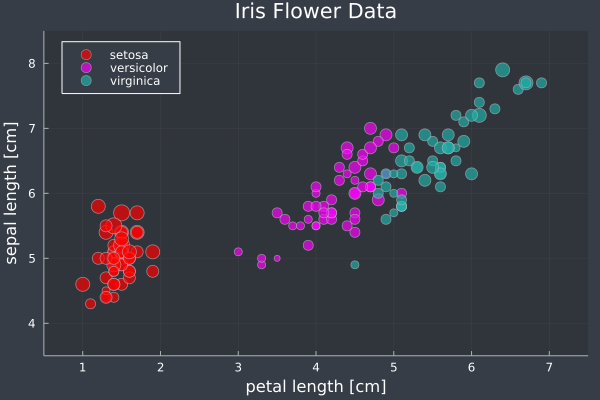

In [8]:
# Plotting is great!
theme(:dark)

Plots.scatter(iris.PetalLength, 
              iris.SepalLength,
              xlabel = "petal length [cm]",
              ylabel = "sepal length [cm]",
              group = iris.Species,
              color = ["red" "magenta" "lightseagreen"],
              markersize = iris.SepalWidth*2.2,
              alpha = .67,
              )
Plots.plot!(xlim = (.5, 7.5), 
            ylim = (3.5, 8.5),
            legend = :topleft, 
            title = "Iris Flower Data")

---

# Part 2. The Perceptron, Linear Regression, and Logistic Regression from Scratch in Julia




---

In [9]:
# General Single Neuron Mutable Struct
mutable struct SingleNeuron
    w_
    errors_
end


# Sign Activation Function
function sign(z)
    return z >= 0 ? 1 : -1
end

# Linear Activation Function
function linear_regr(z)
    return z
end

# Sigmoid Activation Function
function σ(z)
    return 1.0/(1.0 + exp(-z))
end

# MSE Loss Function
function MSE(yi_hat, yi)
    return .5*(yi_hat - yi)^2
end

# Binary Cross Entropy Loss Function
function cross_entropy_loss(yi_hat, yi)
    return -yi*log(yi_hat) - (1 - yi)*log(1 - yi_hat)
end


function train(X, 
               y, 
               activation_function, 
               loss_function; 
               neuron = false, 
               learning_rate = 0.001, 
               epochs = 1_000)
    # Find the dimensions of your feature vectors
    (m, n) = size(X)
    
    # Errors Array over each epoch during training 
    errors_ = []
    if neuron == false
        w_ = randn(n + 1)
        neuron = SingleNeuron(w_, errors_)
    end
    
    # For each epoch consider each feature-target pair
    for _ in 1:epochs
        # error will accumulate errors on each feature-target pair
        error = 0
        
        # Stochastic Gradient Descent
        for (i, yi) in enumerate(y)
            # Grab your current feature vector
            xi = X[i, :]
            
            # Compute the weighted sum of feature plus a bias
            pre_activation = neuron.w_[1:end - 1]'*xi + neuron.w_[end]
            
            # Compute the post activation value
            yi_hat = activation_function(pre_activation)
            
            # Update your weights with stochastic gradient descent
            neuron.w_[1:end - 1] = neuron.w_[1:end - 1] .- learning_rate*(yi_hat - yi)*xi
            
            # Update your bias with stochastic gradient descent 
            neuron.w_[end] = neuron.w_[end] - learning_rate*(yi_hat - yi)
            
            # Update your cummulative error value
            error += loss_function(yi_hat, yi)
        end
        
        # Push error/m into the errors_ field after each epoch
        push!(neuron.errors_, error/m)
    end
    
    # Return your trained SingleNeuron type
    return neuron
end
        

train (generic function with 1 method)

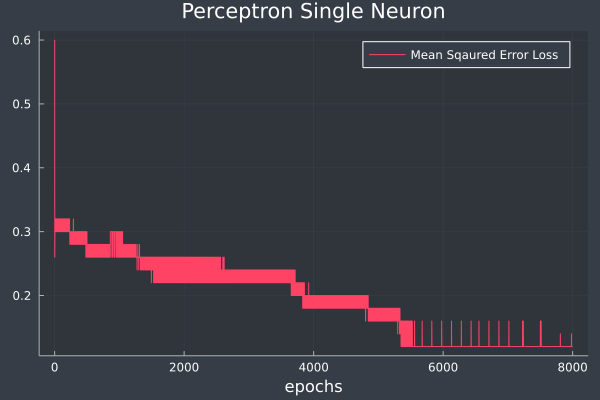

In [10]:
perceptron_X = Array(iris[51:150, [:PetalLength, :SepalLength]])
perceptron_y = [target == "versicolor" ? 1 : -1 for target in iris[51:150, :Species]]

neuron = train(perceptron_X, 
               perceptron_y, 
               sign, 
               MSE, 
               learning_rate = 0.0001, 
               epochs = 8_000)

Plots.plot(neuron.errors_, 
           label = "Mean Sqaured Error Loss", 
           title = "Perceptron Single Neuron",
           xlabel = "epochs")

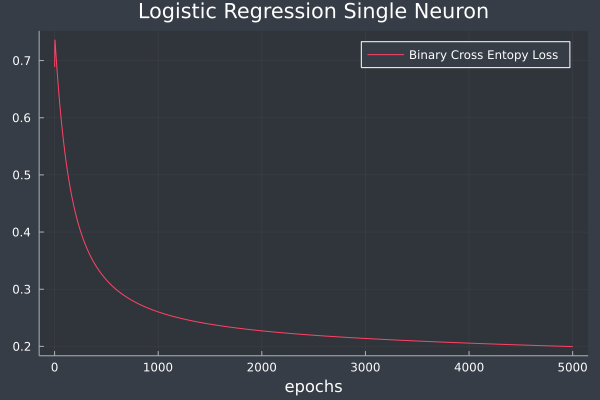

In [11]:
logistic_X = Array(iris[51:150, [:PetalLength, :SepalLength]])
logistic_y = [target == "versicolor" ? 0 : 1 for target in iris[51:150, :Species]]

logistic_neuron = train(logistic_X, 
                        logistic_y, 
                        σ, 
                        cross_entropy_loss, 
                        learning_rate = 0.001, 
                        epochs = 5_000)

Plots.plot(logistic_neuron.errors_, 
           label = "Binary Cross Entopy Loss", 
           title = "Logistic Regression Single Neuron",
           xlabel = "epochs")

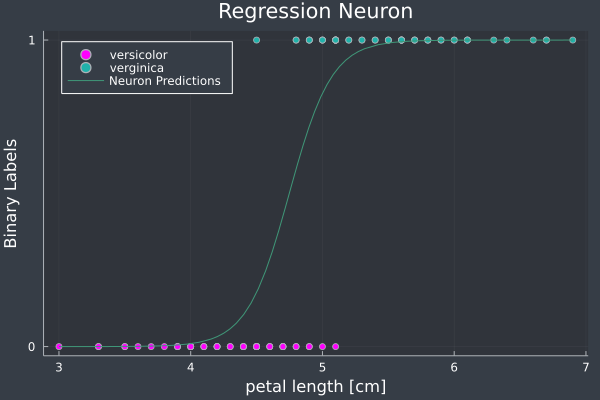

In [12]:
logistic_X = hcat(iris[51:150, :PetalLength])
logistic_y = [target == "versicolor" ? 0 : 1 for target in iris[51:150, :Species]]

logistic_neuron = train(logistic_X, 
                        logistic_y, 
                        σ, 
                        cross_entropy_loss, 
                        learning_rate = 0.01, epochs = 5_000)

Plots.scatter(logistic_X[1:50, :], 
              logistic_y[1:50, :], 
              color = "magenta", 
              label = "versicolor")

Plots.scatter!(logistic_X[51:100, :], 
              logistic_y[51:100, :], 
              color = "lightseagreen",
              label = "verginica")

Plots.plot!(x -> σ.(logistic_neuron.w_[1]* x + logistic_neuron.w_[end]), 
            label = "Neuron Predictions")

Plots.plot!(xlabel = "petal length [cm]",
            ylabel = "Binary Labels",
            yticks = [0, 1],
            legend = :topleft, 
            title = "Regression Neuron")

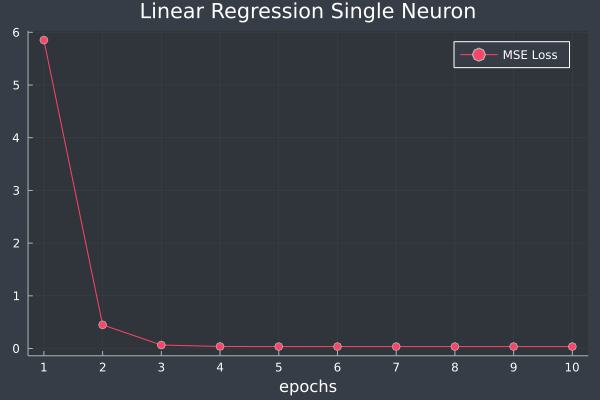

In [13]:
regression_X = hcat(iris[1:50, :SepalLength])
regression_y = iris[1:50, :SepalWidth]
regr_neuron = train(regression_X, 
                    regression_y, 
                    linear_regr, 
                    MSE, 
                    learning_rate = 0.001, 
                    epochs = 10)


Plots.plot(regr_neuron.errors_, 
           label = "MSE Loss", 
           title = "Linear Regression Single Neuron",
           xticks = 1:10,
           marker = :o,
           xlabel = "epochs")

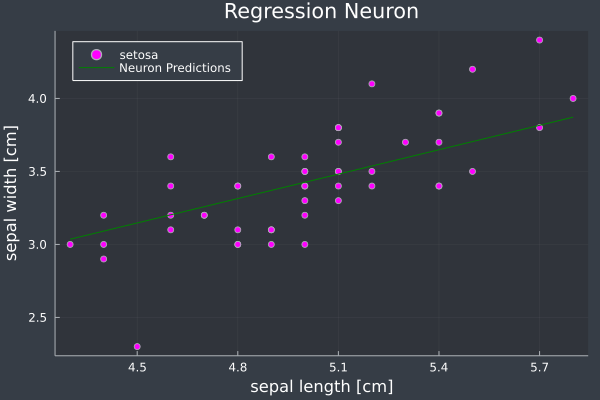

In [14]:
Plots.scatter(regression_X, regression_y, label = "setosa", color = "magenta")

Plots.plot!(x -> regr_neuron.w_[1]* x + regr_neuron.w_[end], 
            label = "Neuron Predictions",
            color = "green")

Plots.plot!(xlabel = "sepal length [cm]",
            ylabel = "sepal width [cm]",
            legend = :topleft, 
            title = "Regression Neuron")